In [1]:
# Import all the necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [2]:
# Sets the number of examples.
M = 30

# Reset pseudo random number generator so that the results are reproducible.
np.random.seed(42)

# Create target function and its noisy version.
x1 = np.linspace(-3, 3, M).reshape(M, 1)
y = 2 + x1 + 0.5*x1**2;
y_noisy = y + np.random.randn(M, 1)

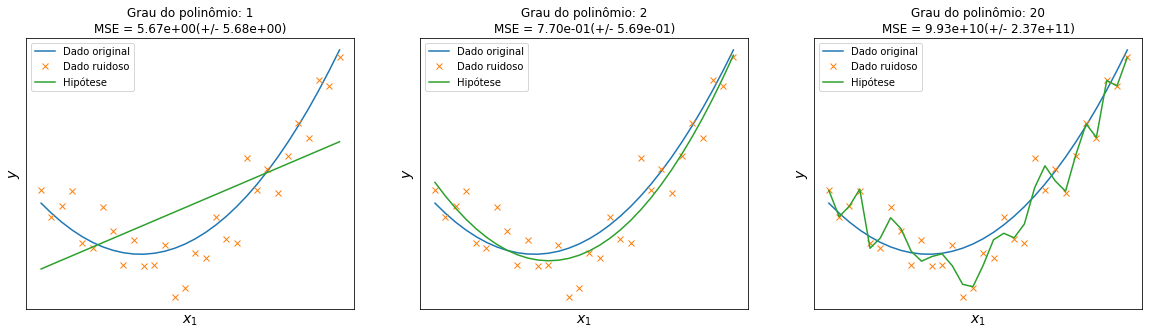

In [4]:
# Polinomial degrees to be tested.
degrees = [1, 2, 20]

# Include column of ones once the target function has a bias.
include_bias = True

plt.figure(figsize=(20, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())    

    # Instantiate a polynomial with the given degree.
    poly_features = PolynomialFeatures(degree=degrees[i], include_bias=include_bias)
    # Instantiate a scaler that will standardize the features.
    std_scaler = StandardScaler()
    # Instantiate a linear regressor.
    lin_reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])

    # Train the polinomial model, i.e., the hypothesis.
    polynomial_regression.fit(x1, y_noisy)
    
    # Evaluate the models using crossvalidation
    scores = cross_val_score(polynomial_regression, x1, y_noisy, scoring="neg_mean_squared_error", cv=10)    

    # Use the trained model for prediction.
    yp1 = polynomial_regression.predict(x1)

    plt.plot(x1, y, label='Dado original')
    plt.plot(x1, y_noisy, 'x', label='Dado ruidoso')
    plt.plot(x1, yp1, label='Hipótese')
    plt.legend(loc='best')
    plt.xlabel('$x_1$', fontsize=14)
    plt.ylabel('$y$', fontsize=14)
    plt.grid()
    plt.title("Grau do polinômio: {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

#Show the plot.
plt.show()